# ISHANT KUNDRA

# Computer Vision

# PART- A

## Q1. Import and Understand the data [12 Marks]

### A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]

In [1]:
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile('Desktop/data/plant-seedlings-classification.zip','r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path="Desktop/data")

### B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]

In [2]:
import os 
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [3]:
os.getcwd()

'/Users/ishantkundra'

In [4]:
ls=os.listdir('Desktop/data/plant-seedlings-classification/train')
ls.remove('.DS_Store')
ls

['Cleavers',
 'Sugar beet',
 'Common Chickweed',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Fat Hen',
 'Common wheat',
 'Black-grass',
 'Small-flowered Cranesbill',
 'Charlock',
 'Maize']

In [5]:
name_of_img =[]
class_name = []
img_array = []


for i in ls:
  count=0
  print(count)
  print(i)
  for image in (os.listdir('Desktop/data/plant-seedlings-classification/train/'+i)):
    name_of_img.append(image)
    class_name.append(i)
    img_array.append(cv2.imread('Desktop/data/plant-seedlings-classification/train/'+i+"/"+image))
    count+=1
    if count>200:
      break

0
Cleavers
0
Sugar beet
0
Common Chickweed
0
Loose Silky-bent
0
Scentless Mayweed
0
Shepherds Purse
0
Fat Hen
0
Common wheat
0
Black-grass
0
Small-flowered Cranesbill
0
Charlock
0
Maize


In [6]:
os.listdir

<function posix.listdir(path=None)>

In [7]:
td = pd.DataFrame({'name_of_image' :name_of_img,'class_name':class_name, 'img_arry':img_array})

In [8]:
td.shape

(2412, 3)

In [9]:
td.tail(3)

name_of_image class_name  \
2409  5fdb1dccf.png      Maize   
2410  a76555ad2.png      Maize   
2411  cdcb0f735.png      Maize   

                                               img_arry  
2409  [[[50, 68, 83], [52, 69, 85], [50, 66, 82], [5...  
2410  [[[48, 60, 71], [55, 68, 78], [49, 62, 73], [3...  
2411  [[[39, 50, 67], [37, 50, 68], [36, 49, 69], [3...

### C. Write a function that will select n random images and display images along with its species. [4 Marks]

In [10]:
def random_img(n):
  rarr = np.random.randint(1,2348, (n))
  for i in rarr:
    img =td['img_arry'][i]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.matshow(img)
    plt.xlabel(td['class_name'][i])
    plt.title([i])

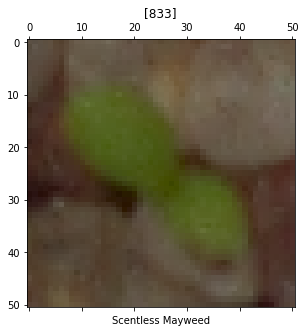

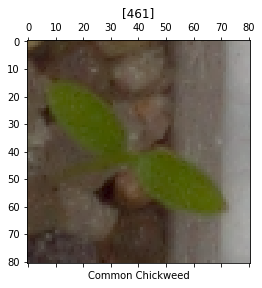

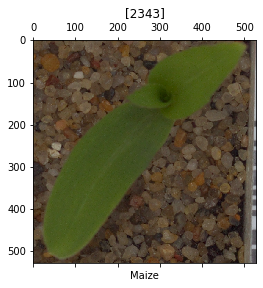

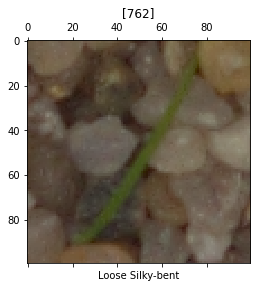

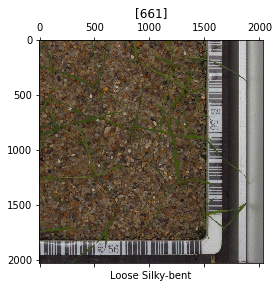

In [11]:
random_img(5)

In [12]:
td['class_name'].value_counts()

Cleavers                     201
Sugar beet                   201
Common Chickweed             201
Loose Silky-bent             201
Scentless Mayweed            201
Shepherds Purse              201
Fat Hen                      201
Common wheat                 201
Black-grass                  201
Small-flowered Cranesbill    201
Charlock                     201
Maize                        201
Name: class_name, dtype: int64

<AxesSubplot:xlabel='count', ylabel='class_name'>

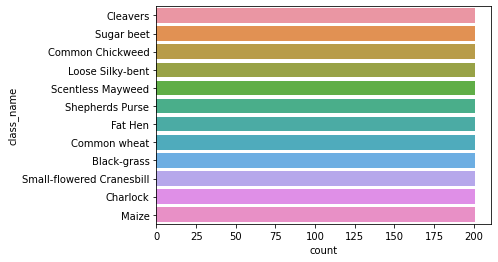

In [13]:
sns.countplot(y = td['class_name'],)

## Q2.Data preprocessing [8 Marks]

### B. Encode labels of the images. [2 Marks]

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

td['label']= label_encoder.fit_transform(td['class_name'])

In [15]:
print(td['label'].unique())
print(td['class_name'].unique())

[ 2 11  3  6  8  9  5  4  0 10  1  7]
['Cleavers' 'Sugar beet' 'Common Chickweed' 'Loose Silky-bent'
 'Scentless Mayweed' 'Shepherds Purse' 'Fat Hen' 'Common wheat'
 'Black-grass' 'Small-flowered Cranesbill' 'Charlock' 'Maize']


In [16]:
print('No of unique value in label',len(td['label'].unique()))
print('No of unique value in Class_name',len(td['class_name'].unique()))

No of unique value in label 12
No of unique value in Class_name 12


In [17]:
label_value = {}
for i, j  in zip(td['label'].unique(),td['class_name'].unique()):
  label_value[i] = j 


In [18]:
for i in range(len(td['label'].unique())):
  print(i,' = ',label_value[i])

0  =  Black-grass
1  =  Charlock
2  =  Cleavers
3  =  Common Chickweed
4  =  Common wheat
5  =  Fat Hen
6  =  Loose Silky-bent
7  =  Maize
8  =  Scentless Mayweed
9  =  Shepherds Purse
10  =  Small-flowered Cranesbill
11  =  Sugar beet


### A. Create X & Y from the DataFrame. [2 Marks]

In [19]:
x_train =td['img_arry']

In [20]:
x_train[0].shape

(531, 531, 3)

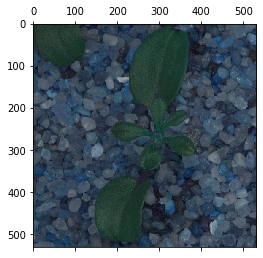

In [21]:
plt.matshow(x_train[0])

In [22]:
y_train =td['label']

In [23]:
y_train.shape

(2412,)

### C. Unify shape of all the images. [2 Marks]

In [24]:
type(x_train)

pandas.core.series.Series

In [25]:
test_img = cv2.resize(x_train[0],(160,160))

In [26]:
len(x_train)

2412

In [27]:
x_train.ndim

1

In [28]:
unique_size_x = []
for i in range(len(x_train)):
  unique_size_x.append(cv2.resize(x_train[i],(160,160)))


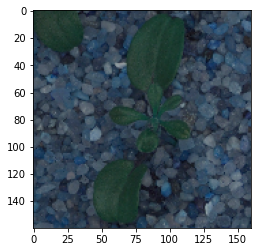

In [29]:
plt.imshow(unique_size_x[0]/255)

### D. Normalise all the images. [2 Marks]

In [30]:
normalize_x = (np.array(unique_size_x))/255

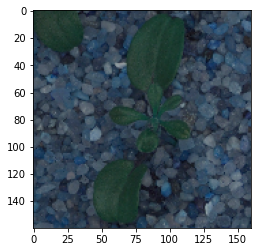

In [31]:
plt.imshow(normalize_x[0])

In [32]:
normalize_x.shape

(2412, 160, 160, 3)

In [33]:
type(normalize_x)

numpy.ndarray

In [34]:
normalize_x.ndim

4

## Q3. Model training [10 Marks]

### A. Split the data into train and test data. [2 Marks]

In [35]:
from sklearn.model_selection import train_test_split
x_train_final,x_test_final,y_train_final,y_test_final = train_test_split(normalize_x,y_train,test_size=0.162,random_state=100)

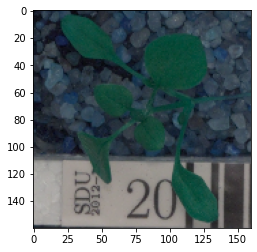

In [36]:
plt.imshow(x_train_final[1])

In [37]:
type(x_train_final)

numpy.ndarray

### B. Create new CNN architecture to train the model. [4 Marks]

In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [39]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(12, activation='softmax')
])



cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


2023-02-28 18:42:11.769041: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
y_train_final.shape

(2021,)

In [41]:
cnn.run_eagerly = True

### C. Train the model on train data and validate on test data. [2 Marks]

In [42]:
cnn.fit(x_train_final, y_train_final, epochs=1, batch_size = 20)

102/102 [==============================] - 52s 500ms/step - loss: 3.4568 - accuracy: 0.1549


In [43]:
cnn.evaluate(x_test_final,y_test_final)

13/13 [==============================] - 3s 258ms/step - loss: 2.3204 - accuracy: 0.1790


[2.3204448223114014, 0.17902813851833344]

In [44]:
y_prd = cnn.predict(x_test_final)

In [45]:
y_prd

array([[0.02610332, 0.09724817, 0.06188657, ..., 0.08737626, 0.07985972,
        0.0288914 ],
       [0.06585167, 0.06014898, 0.10339536, ..., 0.09316304, 0.11843089,
        0.05113091],
       [0.00768539, 0.11501281, 0.02730694, ..., 0.07447016, 0.06579284,
        0.00720127],
       ...,
       [0.1594069 , 0.05705781, 0.06630961, ..., 0.06387038, 0.10920589,
        0.05869397],
       [0.03450872, 0.11406635, 0.05387397, ..., 0.07584233, 0.07310896,
        0.0332053 ],
       [0.04845433, 0.09377507, 0.05554012, ..., 0.07935178, 0.09120662,
        0.03267398]], dtype=float32)

### D. Select a random image and print actual label and predicted label for the same. [2 Marks]

In [51]:
nn= cnn.predict(x_test_final[[0]])
#plt.imshow(td['img_arry'][1])

In [54]:
np.argmax(nn)

7

Text(0.5, 0, 'Maize')

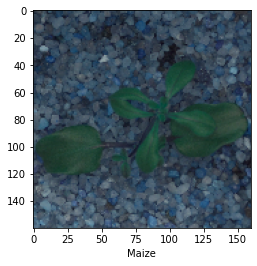

In [57]:
plt.imshow(x_test_final[0])
label_value[np.argmax(nn)]
plt.xlabel(label_value[np.argmax(nn)])

# PART- B

## Q1. Import and Understand the data [5 Marks]

### A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]

In [61]:
from PIL import Image
import random
import tflearn.datasets
import cv2
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [62]:
x, y = tflearn.datasets.oxflower17.load_data()

In [63]:
y.shape

(1360,)

In [64]:
y

array([ 6,  5,  1, ..., 13,  5, 16])

In [65]:
x.shape

(1360, 224, 224, 3)

In [66]:
os.listdir("17flowers")

['jpg', '17flowers.pkl', '17flowers.tgz']

In [67]:
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img
    

In [68]:
images=[]
labels=[]
total=1361
j=0
for i in range(1, total): 
    
    fname="17flowers/jpg/"+str(j)+"/image_"   
    fpath = os.path.join(fname +str(i).zfill(4) +".jpg")
    images.append(load_data(fpath))
    labels.append(j) 
    if i%80==0: 
      j+=1

### B. Print Number of images and shape of the images. [1 Marks]

In [69]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
images.shape

(1360, 224, 224, 3)

### C. Print count of each class from y. [2 Marks]

In [70]:
print(np.unique(y, return_counts = True))
print(type(labels))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]), array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]))
<class 'numpy.ndarray'>


In [71]:
print(type(images))

<class 'numpy.ndarray'>


## Q2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]

### A. Display 5 random images. [1 Marks]

/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


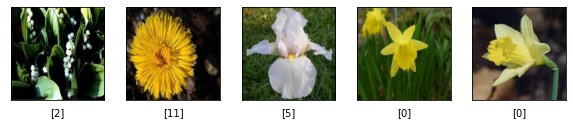

In [72]:
plt.figure(figsize=(10,10)) 
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j = np.random.randint(1,1360)
    plt.imshow(images[j]/255, cmap=plt.cm.binary)
    plt.xlabel(labels[j])

### B. Select any image from the dataset and assign it to a variable. [1 Marks]

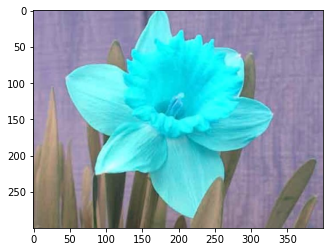

In [82]:
img1=cv2.imread("17flowers/jpg/0/image_0004.jpg")
img1 =cv2.resize(img1,(400,300))
plt.imshow(img1)
#cv2_imshow(img1)
trans_image = []
trans_image.append(img1)

### C. Transform the image into grayscale format and display the same. [3 Marks]

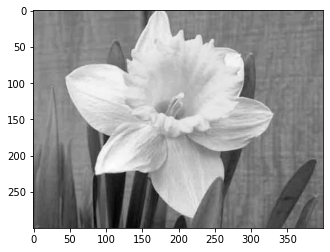

In [85]:
grey_img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
grey =cv2.resize(grey_img,(400,300))
plt.imshow(grey,cmap="gray")
#cv2_imshow(grey)

trans_image.append(grey)

### D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

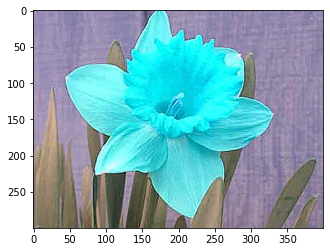

In [87]:
sharpen=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

img_sharpen= cv2.filter2D(src=img1, ddepth=-80, kernel=sharpen)

img_sharpen =cv2.resize(img_sharpen,(400,300))
plt.imshow(img_sharpen)
#cv2_imshow(img_sharpen)

trans_image.append(img_sharpen)

### E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]

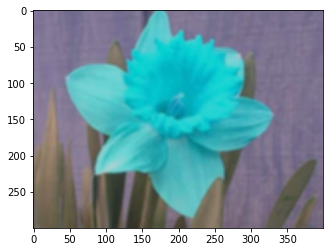

In [88]:
blur= np.ones((5, 5), np.float32)/30
img_blur= cv2.filter2D(src=img1, ddepth=-10, kernel=blur)

img_blur =cv2.resize(img_blur,(400,300))
plt.imshow(img_blur)
#cv2_imshow(img_blur)

trans_image.append(img_blur)

### F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

<Figure size 720x720 with 0 Axes>

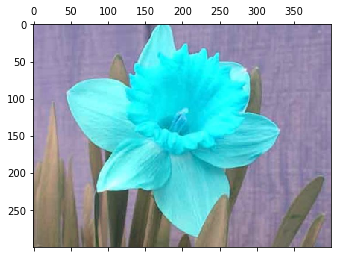

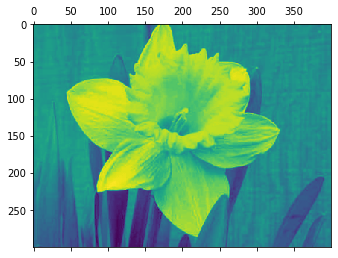

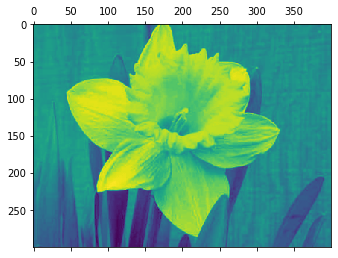

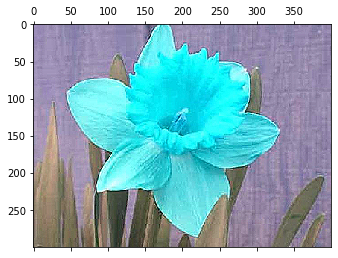

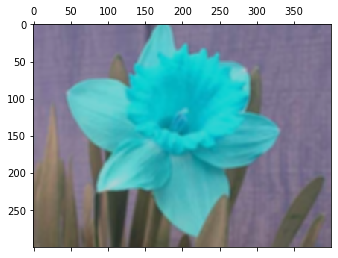

In [89]:
plt.figure(figsize=(10,10)) 
for i in trans_image:
  # j = trans_image[i]
  plt.matshow(i)
  #cv2_imshow(i)

## Q3. Model training and Tuning: [15 Marks]

### A. Split the data into train and test with 80:20 proportion. [2 Marks]

In [90]:
print(type(images))
print(type(labels))
print(type(y))
print((images.shape))
print((labels.shape))
print((y.shape))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1360, 224, 224, 3)
(1360, 1)
(1360,)


In [91]:
from sklearn.model_selection import train_test_split 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8)

In [92]:
svm_trian_image = train_images.reshape(1088,224*224*3)
svm_test_image = test_images.reshape(len(test_images),224*224*3)


In [93]:
svm_trian_image.shape

(1088, 150528)

In [94]:
svm_train_labels= train_labels.reshape(-1)
svm_test_labels= test_labels.reshape(-1)

In [95]:
np.size(svm_test_labels)

272

### B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

In [96]:
from sklearn.svm import SVC


SVC(C=1.0,gamma='auto', kernel='rbf',probability=False, 
  random_state=None,
  tol=0.001, verbose=False)

svm_model=SVC()

svm_model.fit(svm_trian_image, svm_train_labels)

SVC()

In [97]:
svm_y_pred_all = svm_model.predict(svm_test_image)

In [98]:
np.size(svm_y_pred_all)

272

In [99]:
np.size(svm_y_pred_all)

272

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(svm_test_labels,svm_y_pred_all)


array([[ 6,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,
         0],
       [ 0, 10,  2,  2,  2,  0,  0,  0,  1,  0,  2,  0,  0,  0,  0,  0,
         0],
       [ 0,  3, 13,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  1, 11,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1],
       [ 0,  0,  0,  2, 13,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  1,  0, 12,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,
         0],
       [ 0,  5,  1,  0,  0,  0,  6,  4,  1,  0,  0,  1,  0,  0,  0,  0,
         0],
       [ 0,  0,  1,  2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  2,  0,
         0],
       [ 0,  1,  1,  2,  1,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  2,
         1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 13,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  4,
         0],
       [ 2,  0,  0,  0,  0,  0,  2,  2,  0,  1,  0,  4,  1,  0,  

<AxesSubplot:>

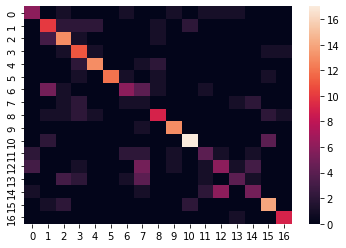

In [101]:
import seaborn as sns
sns.heatmap(confusion_matrix(svm_test_labels,svm_y_pred_all))

In [102]:
svm_y_pred = svm_model.predict(svm_trian_image[[4]] )

In [103]:
svm_y_pred

array([11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


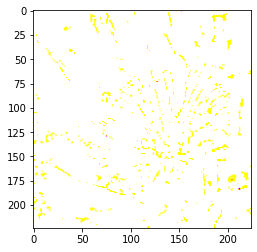

In [106]:
plt.imshow(train_images[4])
#cv2_imshow(train_images[4])

In [107]:
train_labels[4]

array([11])

### C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [109]:
ANN_model = models.Sequential([
    layers.Flatten(input_shape=(224,224,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(17, activation='softmax')    
    ])


ANN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [110]:
ANN_model.fit(train_images, train_labels, epochs=10)

Train on 1088 samples
Epoch 1/10
1088/1088 [==============================] - 77s 71ms/sample - loss: 27509.1845 - acc: 0.0561
Epoch 2/10
1088/1088 [==============================] - 62s 57ms/sample - loss: 1670.6559 - acc: 0.1140
Epoch 3/10
1088/1088 [==============================] - 62s 57ms/sample - loss: 414.5258 - acc: 0.1783
Epoch 4/10
1088/1088 [==============================] - 61s 56ms/sample - loss: 130.2141 - acc: 0.2785
Epoch 5/10
1088/1088 [==============================] - 68s 63ms/sample - loss: 67.6006 - acc: 0.3796
Epoch 6/10
1088/1088 [==============================] - 73s 67ms/sample - loss: 65.1618 - acc: 0.3897
Epoch 7/10
1088/1088 [==============================] - 70s 64ms/sample - loss: 34.2884 - acc: 0.4972
Epoch 8/10
1088/1088 [==============================] - 66s 60ms/sample - loss: 33.2607 - acc: 0.5028
Epoch 9/10
1088/1088 [==============================] - 62s 57ms/sample - loss: 36.2890 - acc: 0.4540
Epoch 10/10
1088/1088 [==============================

In [121]:
y_ann_pred = ANN_model.predict(test_images)

In [123]:
y_ann_pred

array([[1.0259046e-28, 1.3078177e-38, 0.0000000e+00, ..., 0.0000000e+00,
        2.8298752e-17, 0.0000000e+00],
       [0.0000000e+00, 2.8759641e-06, 2.3788651e-18, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.2365505e-20],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.8599507e-23, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.6336699e-19, 5.1361938e-37, 0.0000000e+00, ..., 0.0000000e+00,
        9.9074066e-01, 1.5275572e-29]], dtype=float32)

In [124]:
ann_pred = ANN_model.predict(train_images[[14]])

In [125]:
ann_pred.argmax()

11

### D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

In [126]:
train_images.shape

(1088, 224, 224, 3)

In [131]:
from tensorflow.keras import datasets,layers,models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(224, 224, 3)))#32 is numbers of filters of 3x3
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))

model.add(layers.Dense(17))#output layer

In [132]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


In [133]:
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - ETA: 0s - loss: 236.9921 - acc: 0.0634

/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 39s 36ms/sample - loss: 236.9921 - acc: 0.0634 - val_loss: 2.8217 - val_acc: 0.0882
Epoch 2/10
1088/1088 [==============================] - 37s 34ms/sample - loss: 2.6657 - acc: 0.1820 - val_loss: 2.7123 - val_acc: 0.1471
Epoch 3/10
1088/1088 [==============================] - 38s 35ms/sample - loss: 2.2077 - acc: 0.3934 - val_loss: 2.9437 - val_acc: 0.1654
Epoch 4/10
1088/1088 [==============================] - 38s 35ms/sample - loss: 1.3940 - acc: 0.6314 - val_loss: 3.5849 - val_acc: 0.2574
Epoch 5/10
1088/1088 [==============================] - 36s 33ms/sample - loss: 0.4258 - acc: 0.8888 - val_loss: 5.1431 - val_acc: 0.2574
Epoch 6/10
1088/1088 [==============================] - 36s 33ms/sample - loss: 0.2559 - acc: 0.9504 - val_loss: 6.0366 - val_acc: 0.2243
Epoch 7/10
1088/1088 [==============================] - 38s 35ms/sample - loss: 0.2637 - acc: 0.9577 - val_loss: 7.6481 - val_acc: 0.2574
Epoch 8/10
1088/1088 [=====================

In [134]:
train_images.shape

(1088, 224, 224, 3)

### E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

In [136]:
a= model.predict(train_images[[1]])

model.evaluate(train_images,train_labels)

In [137]:
a

array([[-18.865223  , -10.420429  ,  -4.6306195 ,  -1.7251904 ,
         -7.460935  ,  11.11155   ,  37.91859   ,  -8.927638  ,
         -4.615447  ,   7.92977   ,   0.05704352,  -0.49975604,
         -0.7803542 ,  -3.8937907 ,  -6.260912  , -14.364368  ,
          9.57439   ]], dtype=float32)

In [138]:
a.argmax()

6

In [139]:
train_labels[1]

array([6])